In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')

# Convert to appropriate data types
df = df.astype({
    'nodes': 'int',
    'guardians': 'int',
    'threshold': 'int',
    'fdkgPercentage': 'float',
    'tallierRetPct': 'float',
    'successRate': 'float'
})

# Add protocol type column without removing DKG from FDKG
df['protocol'] = np.where(
    (df['fdkgPercentage'] == 1.0) & (df['guardians'] == df['nodes'] - 1),
    'DKG',
    'FDKG'
)

# Create filtered dataframes (DKG entries exist in both)
dkg_df = df[df['protocol'] == 'DKG'].copy()
fdkg_df = df.copy()  # Keep all FDKG entries including DKG special cases

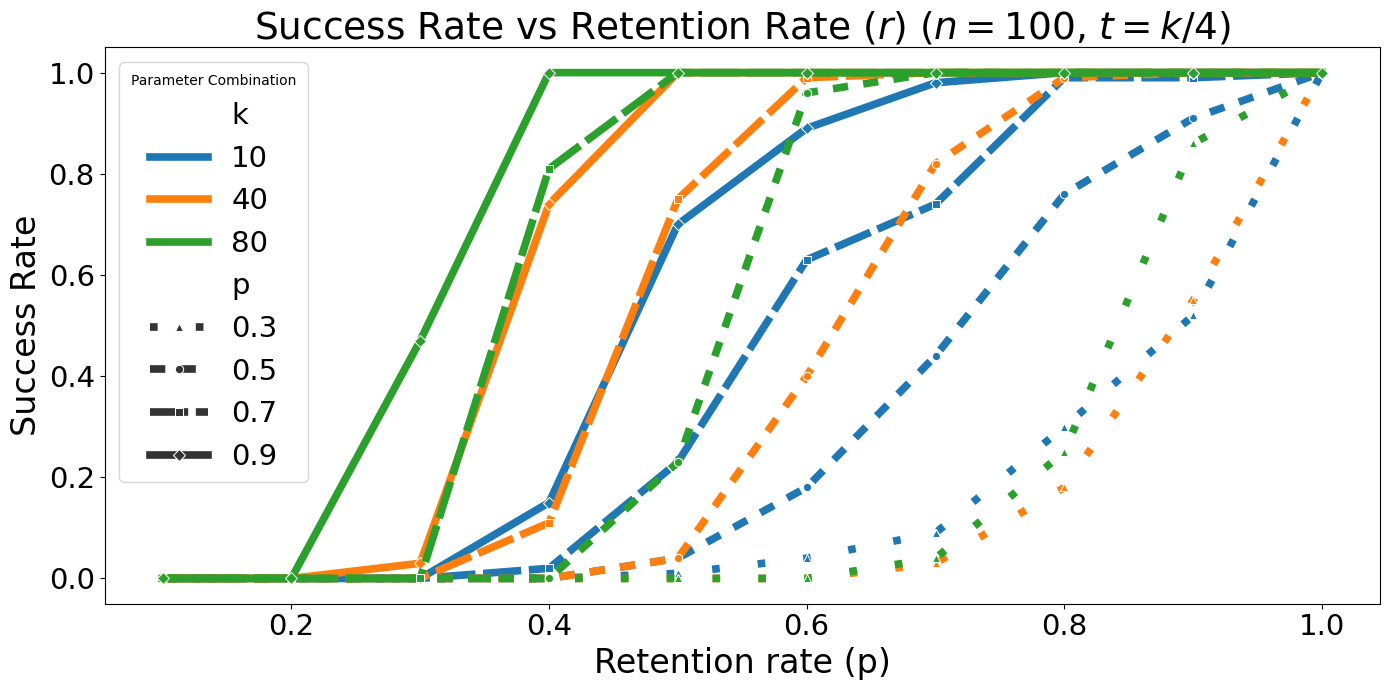

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dense_df = pd.read_csv('../liveness_sim/dense_simulation_results_nodes_BarabasiAlbert.csv')
n = 100


# Rename columns to have `k` and `r` in the final plot legend
fdkg_renamed = dense_df.rename(columns={
    'guardians': 'k',
    'tallierRetPct': 'r',
    'fdkgPercentage': 'p'
})

# Filter and copy to avoid SettingWithCopyWarning
fdkg_subset = fdkg_renamed[
    (fdkg_renamed['nodes'] == n) &
    (fdkg_renamed['p'].isin([0.3, 0.5, 0.7, 0.9])) &
    (fdkg_renamed['threshold'] == fdkg_renamed['k'] // 4) &
    (fdkg_renamed['k'].isin([10, 40, 80]))
].copy()



plt.figure(figsize=(14, 7))

plt.rcParams.update({
    'axes.titlesize': 27,
    'axes.labelsize': 24,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

# Use the "tab10" color palette, and assign distinct markers for each r value.
sns.lineplot(
    data=fdkg_subset,
    x='r',
    y='successRate',
    hue='k',
    style='p',
    palette="tab10",
    linewidth=5.5,
    dashes={0.9: '', 0.7: (5, 1), 0.5: (2, 2), 0.3: (1, 5)},
    markers={0.9: "D", 0.7: "s",0.5: "o", 0.3: "^"}
)



plt.title(f"Success Rate vs Retention Rate ($r$) ($n={n}$, $t=k/4$)")
plt.xlabel("Retention rate (p)")
plt.ylabel("Success Rate")
plt.tight_layout()
plt.savefig("parameters_significance_retention_axis.png")
plt.legend(title="Parameter Combination", loc='upper left')
plt.show()

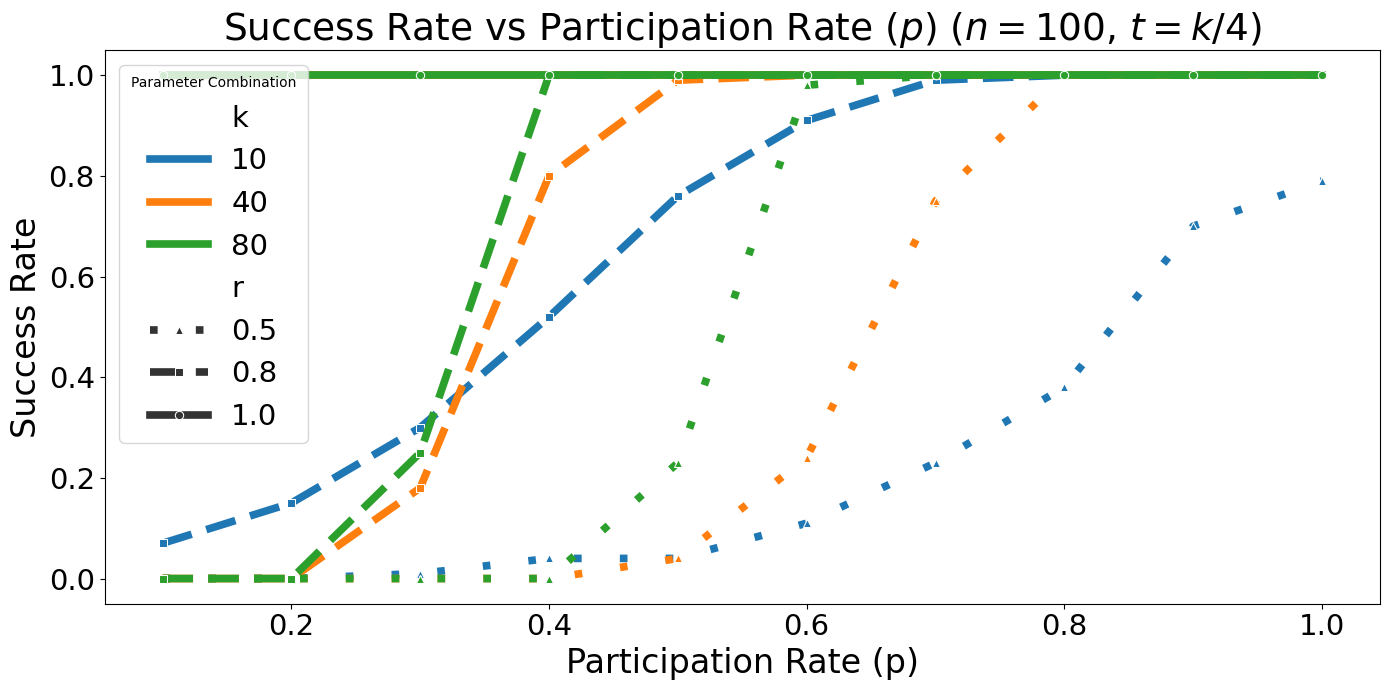

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
dense_df = pd.read_csv('../liveness_sim/dense_simulation_results_nodes_BarabasiAlbert.csv')
n = 100

# Rename columns for clarity
fdkg_renamed = dense_df.rename(columns={
    'guardians': 'k',
    'tallierRetPct': 'r'
})

# Filter data
fdkg_subset = fdkg_renamed[
    (fdkg_renamed['nodes'] == n) &
    (fdkg_renamed['r'].isin([0.5, 0.8, 1.0])) &
    (fdkg_renamed['threshold'] == fdkg_renamed['k'] // 4) &
    (fdkg_renamed['k'].isin([10, 40, 80]))
].copy()

plt.figure(figsize=(14, 7))

# Use the "tab10" color palette, and assign distinct markers for each r value.
sns.lineplot(
    data=fdkg_subset,
    x='fdkgPercentage',
    y='successRate',
    hue='k',
    style='r',
    palette="tab10",
    linewidth=5.5,
    markers={1.0: "o", 0.8: "s", 0.5: "^"},
    dashes={1.0: '', 0.8: (4, 2), 0.5: (1, 5)}
)

plt.rcParams.update({
    'axes.titlesize': 27,
    'axes.labelsize': 24,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

plt.title(f"Success Rate vs Participation Rate ($p$) ($n={n}$, $t=k/4$)")
plt.xlabel("Participation Rate (p)")
plt.ylabel("Success Rate")
plt.legend(title="Parameter Combination", loc='upper left')
plt.tight_layout()
plt.savefig("parameters_significance_participation_axis.png")
plt.show()

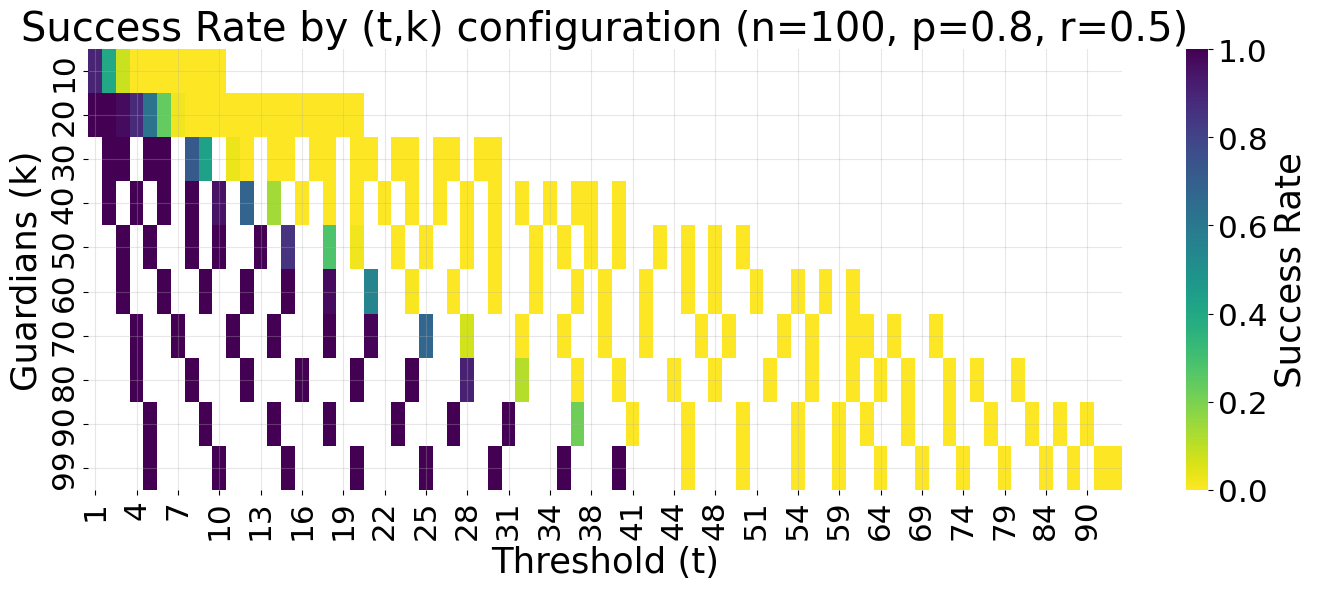

In [40]:

# --------------------------------------------------
# Plot 3: Guardian Set Configuration Heatmap
# Show success rates for different (k,t) combinations
# --------------------------------------------------
n = 100
p = 0.8 # 1.0 0.8
r = 0.5
plt.rcParams.update({
    'axes.titlesize': 18*1.6,
    'axes.labelsize': 16*1.6,
    'xtick.labelsize': 14*1.6,
    'ytick.labelsize': 14*1.6,
    'legend.fontsize': 14*1.6
})


heatmap_data = fdkg_df[
    (fdkg_df['nodes'] == n) &
    (fdkg_df['fdkgPercentage'] == p) &
    (fdkg_df['tallierRetPct'] == r) &
    (fdkg_df['protocol'] == 'FDKG')
].pivot_table(index='guardians', columns='threshold', values='successRate')

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data, 
    annot=False, 
    fmt=".2f", 
    cmap='viridis_r',
    cbar_kws={'label': 'Success Rate'}
)
plt.title(f"Success Rate by (t,k) configuration (n={n}, p={p}, r={r})")
plt.xlabel("Threshold (t)")
plt.ylabel("Guardians (k)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'guardian_set_configuration_n{n}_p{p}_r{r}.png')
plt.show()

In [ ]:
ba_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')
random_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_RandomGraph.csv')

# Add network model identifiers
ba_df['network_model'] = 'Barabási-Albert'
random_df['network_model'] = 'Random'

ba_df = ba_df[ba_df['nodes'] <= 2000]
random_df = random_df[random_df['nodes'] <= 2000]

print(100, len(ba_df[ba_df['nodes'] == 100]))
print(200, len(ba_df[ba_df['nodes'] == 200]))
print(300, len(ba_df[ba_df['nodes'] == 300]))
print(350, len(ba_df[ba_df['nodes'] == 350]))
print(400, len(ba_df[ba_df['nodes'] == 400]))
print(500, len(ba_df[ba_df['nodes'] == 500]))
print(600, len(ba_df[ba_df['nodes'] == 600]))
print(700, len(ba_df[ba_df['nodes'] == 700]))
print(800, len(ba_df[ba_df['nodes'] == 800]))
print(900, len(ba_df[ba_df['nodes'] == 900]))
print(1000, len(ba_df[ba_df['nodes'] == 1000]))
print(1250, len(ba_df[ba_df['nodes'] == 1250]))

100 2280
200 2400
300 2400
350 2400
400 2400
500 2400
600 2400
700 2400
800 2400
900 2400
1000 2400
1250 2400


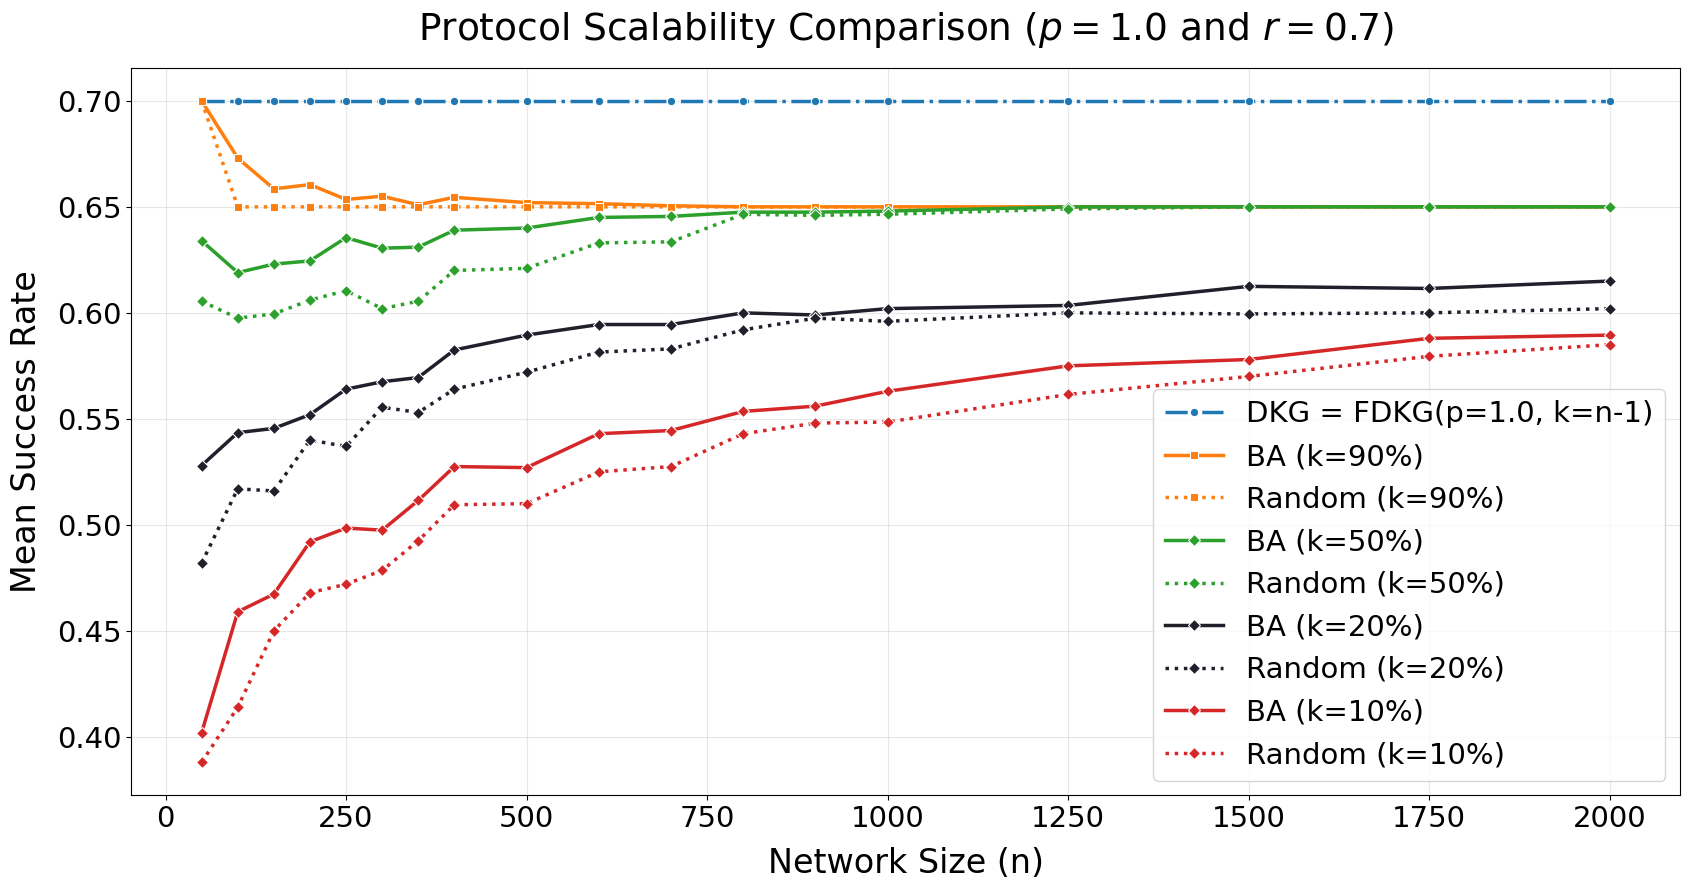

In [ ]:
# --------------------------------------------------
# Plot 4c: Scalability Comparison with Network Models
# --------------------------------------------------

# Load and prepare both network models
ba_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')
random_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_RandomGraph.csv')

# Add network model identifiers
ba_df['network_model'] = 'Barabási-Albert'
random_df['network_model'] = 'Random'

ba_df = ba_df[ba_df['nodes'] <= 2000]
random_df = random_df[random_df['nodes'] <= 2000]

# Combine datasets
combined_df = pd.concat([ba_df, random_df], ignore_index=True)

# Fix SettingWithCopyWarning by working with explicit copies
def prepare_scaling_data(base_df, r, p, guardian_ratio):
    """Safe dataframe preparation with copy"""
    df = base_df[
        (base_df['tallierRetPct'] == r) &
        (base_df['fdkgPercentage'] == p) &
        (base_df['guardians'] == round(base_df['nodes'] * guardian_ratio if guardian_ratio != 1.0 else base_df['nodes']-1))
    ].copy()  # Explicit copy to avoid warnings
    
    # Calculate 95% CI using exact binomial formula
    n_simulations = 100
    df['ci'] = 1.96 * np.sqrt(
        df['successRate'] * (1 - df['successRate']) / n_simulations
    )
    return df

# Common parameters
r = 0.7
p = 1.0

# Prepare all data series
data_sources = [
    {
        'label': 'DKG = FDKG(p=1.0, k=n-1)',
        'guardian_ratio': 1.0,
        'network_model': 'all',
        'style': {'color': '#1f77b4', 'linestyle': '-.', 'marker': 'o'}
    },
    {
        'label': 'BA (k=90%)',
        'guardian_ratio': 0.9,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#ff7f0e', 'linestyle': '-', 'marker': 's'}
    },
    {
        'label': 'Random (k=90%)',
        'guardian_ratio': 0.9,
        'network_model': 'Random',
        'style': {'color': '#ff7f0e', 'linestyle': ':', 'marker': 's'}
    },
    {
        'label': 'BA (k=50%)',
        'guardian_ratio': 0.5,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#2ca02c', 'linestyle': '-', 'marker': 'D'}
    },
    {
        'label': 'Random (k=50%)',
        'guardian_ratio': 0.5,
        'network_model': 'Random', 
        'style': {'color': '#2ca02c', 'linestyle': ':', 'marker': 'D'}
    },
    {
        'label': 'BA (k=20%)',
        'guardian_ratio': 0.20,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#1f202c', 'linestyle': '-', 'marker': 'D'}
    },
    {
        'label': 'Random (k=20%)',
        'guardian_ratio': 0.20,
        'network_model': 'Random', 
        'style': {'color': '#1f202c', 'linestyle': ':', 'marker': 'D'}
    },
    {
        'label': 'BA (k=10%)',
        'guardian_ratio': 0.10,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#d62728', 'linestyle': '-', 'marker': 'D'}
    },
    {
        'label': 'Random (k=10%)',
        'guardian_ratio': 0.10,
        'network_model': 'Random', 
        'style': {'color': '#d62728', 'linestyle': ':', 'marker': 'D'}
    }
]
plt.rcParams.update({
    'axes.titlesize': 18*1.5,
    'axes.labelsize': 16*1.5,
    'xtick.labelsize': 14*1.5,
    'ytick.labelsize': 14*1.5,
    'legend.fontsize': 14*1.5
})
plt.figure(figsize=(17, 9))

# Plot each series with custom styling
for source in data_sources:
    if source['network_model'] == 'all':
        df = prepare_scaling_data(combined_df, r, p, source['guardian_ratio'])
    else:
        df = prepare_scaling_data(
            combined_df[combined_df['network_model'] == source['network_model']], 
            r, p, source['guardian_ratio']
        )
        
    sns.lineplot(
        data=df,
        x='nodes',
        y='successRate',
        label=source['label'],
        linewidth=2.5,
        errorbar=None,  # Remove error bars if present
        **source['style']
    )

plt.title(f"Protocol Scalability Comparison ($p={p}$ and $r={r}$)", pad=20)
plt.xlabel("Network Size (n)", labelpad=10)
plt.ylabel("Mean Success Rate", labelpad=10)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.savefig('network_model_comparison.png')
plt.tight_layout()
plt.show()

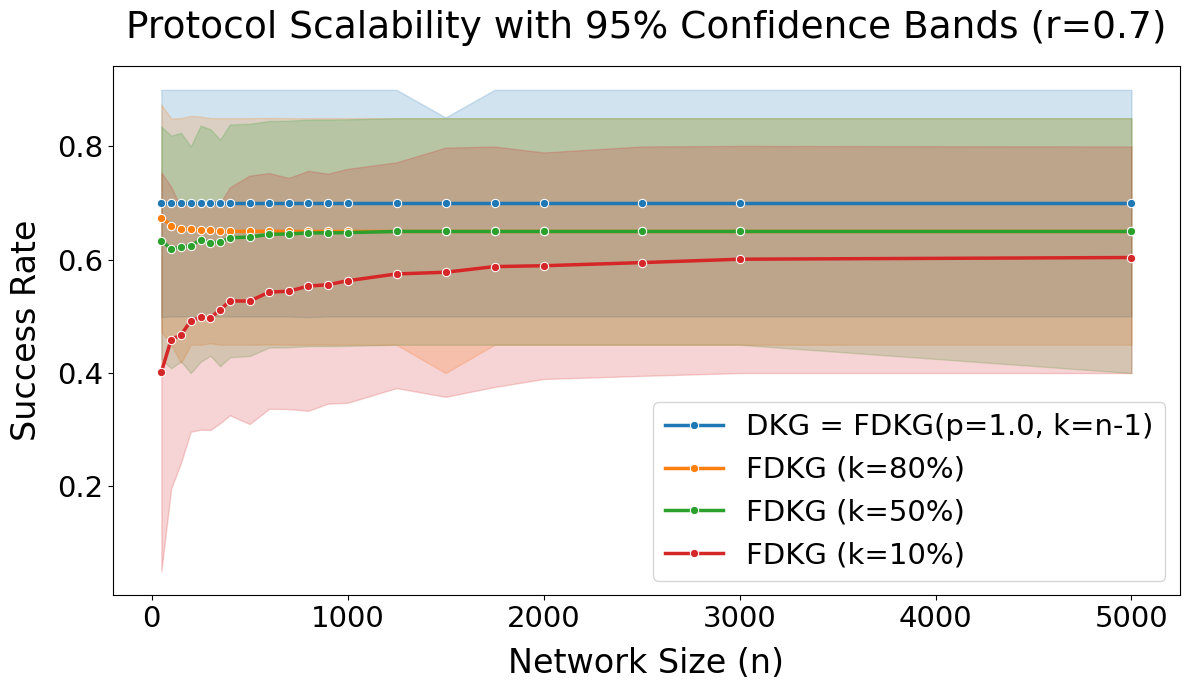

In [7]:
# --------------------------------------------------
# Plot 4: Scalability Comparison with Error Visualization (Fixed)
# --------------------------------------------------

# Fix SettingWithCopyWarning by working with explicit copies
def prepare_scaling_data(base_df, r, p, guardian_ratio):
    """Safe dataframe preparation with copy"""
    df = base_df[
        (base_df['tallierRetPct'] == r) &
        (base_df['fdkgPercentage'] == p) &
        (base_df['guardians'] == round(base_df['nodes'] * guardian_ratio if guardian_ratio != 1.0 else base_df['nodes']-1))
    ].copy()  # Explicit copy to avoid warnings
    
    # Calculate 95% CI using exact binomial formula
    n_simulations = 100
    df['ci'] = 1.96 * np.sqrt(
        df['successRate'] * (1 - df['successRate']) / n_simulations
    )
    return df

# Prepare data with proper error handling
dkg_scaling = prepare_scaling_data(dkg_df, r, 1.0, 1.0)  # k=n-1 for DKG
fdkg_scaling80 = prepare_scaling_data(fdkg_df, r, 1.0, 0.8)
fdkg_scaling50 = prepare_scaling_data(fdkg_df, r, 1.0, 0.5)
fdkg_scaling10 = prepare_scaling_data(fdkg_df, r, 1.0, 0.1)

plt.figure(figsize=(12, 7))

# Plot with confidence bands using Seaborn's built-in CI
sns.lineplot(
    data=dkg_scaling,
    x='nodes',
    y='successRate',
    label='DKG = FDKG(p=1.0, k=n-1)',
    color='#1f77b4',
    linewidth=2.5,
    marker='o',
    err_style='band',  # Show confidence bands
    errorbar=('ci', 95)  # Use precomputed CI
)

for df, label, color in [
    (fdkg_scaling80, 'FDKG (k=80%)', '#ff7f0e'),
    (fdkg_scaling50, 'FDKG (k=50%)', '#2ca02c'),
    (fdkg_scaling10, 'FDKG (k=10%)', '#d62728')
]:
    sns.lineplot(
        data=df,
        x='nodes',
        y='successRate',
        label=label,
        color=color,
        linewidth=2.5,
        marker='o',
        err_style='band',
        
    )

plt.title(f"Protocol Scalability with 95% Confidence Bands (r={r})", pad=20)
plt.xlabel("Network Size (n)", labelpad=10)
plt.ylabel("Success Rate", labelpad=10)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(False, alpha=0.3)
plt.tight_layout()
plt.show()